# Data Analysis

### Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from datetime import datetime, timedelta
import time
import warnings

start_time = time.time()
register_matplotlib_converters()
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 1000, 'display.max_rows', 1000, 'display.width', None)

**Data Collection:**

In [2]:
health = pd.read_csv("../input/dataset/Health.csv")
holidays = pd.read_csv("../input/dataset/Holidays.csv")
data = pd.read_csv("../input/dataset/SelectedData.2.1.csv")
products = pd.read_csv("../input/dataset/SelectedProducts.2.1.csv")
samples = pd.read_csv("../input/dataset/SelectedSamples.2.1.csv")
trends = pd.read_csv("../input/dataset/Trends.csv")
weather = pd.read_csv("../input/dataset/WeatherFeatures.csv")

**Data preprocessing:** Merge datasets, create time series stock-keeping unit and add quantity

In [3]:
# Merge products and data to be able to extract Quantity of product families
data = data.drop_duplicates(subset=('Pharmacy', 'Product', 'Brand', 'Strength'), keep='first')
dataframe = pd.merge(products[['Pharmacy', 'Product', 'Brand', 'Strength']],
                     data[['Pharmacy', 'Product', 'Brand', 'Strength', 'Category', 'Description', 'Country',
                           'City']], on=['Pharmacy', 'Product', 'Brand', 'Strength'])
# Add weather features to get a time series for every stock-keeping unit
dataframe = pd.merge(dataframe, weather, on=('City', 'Country'), how='left')
# Add Quantity
dataframe = pd.merge(dataframe, samples, on=(['Pharmacy', 'Product', 'Brand', 'Strength', 'Year', 'Week']), how='left')

# Time variable
Time = []
Date = datetime(2017, 1, 2)
while Date < datetime(2019, 6, 11):
    Time.append(Date)
    Date += timedelta(weeks=1)

Number of unique products, brands and strengths

In [4]:
print('Products: {}'.format(dataframe['Product'].nunique()))
print('Brands: {}'.format(dataframe['Brand'].nunique()))
print('Strengths: {}'.format(dataframe['Strength'].nunique()))
print('Sales observations: {}'.format(len(samples)))

Products: 9128
Brands: 11240
Strengths: 2022
Sales observations: 515856


Overview of the sales quantities

In [5]:
samples[['Pharmacy', 'Product', 'Brand', 'Strength', 'Year', 'Week', 'Quantity']].head()

,Pharmacy,Product,Brand,Strength,Year,Week,Quantity
0,Pharmacy 1,Aceclofenac / Paracetamol / Chlorzoxazone,Rilif Mr,100 mg / 500 mg / 375 mg,2017,6,5
1,Pharmacy 1,Aceclofenac / Paracetamol / Chlorzoxazone,Rilif Mr,100 mg / 500 mg / 375 mg,2017,14,10
2,Pharmacy 1,Aceclofenac / Paracetamol / Chlorzoxazone,Rilif Mr,100 mg / 500 mg / 375 mg,2017,17,4
3,Pharmacy 1,Aceclofenac / Paracetamol / Chlorzoxazone,Rilif Mr,100 mg / 500 mg / 375 mg,2017,18,25
4,Pharmacy 1,Aceclofenac / Paracetamol / Chlorzoxazone,Rilif Mr,100 mg / 500 mg / 375 mg,2017,24,10


Share of pharmacies per country

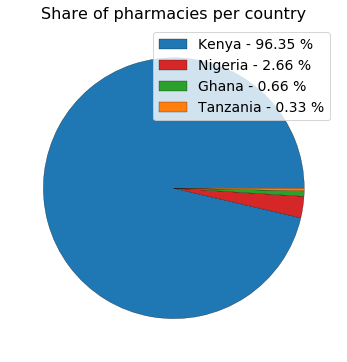

In [6]:
pharmacyCountry = dataframe.groupby(['Country'])['Pharmacy'].nunique().sort_values(
    ascending=False)

plt.figure(figsize=(8, 6))
plt.pie(pharmacyCountry, colors=['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e'],
        wedgeprops=dict(edgecolor='black', linewidth=0.25))
percentage1 = 100. * pharmacyCountry / pharmacyCountry.sum()
plt.legend(['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(pharmacyCountry.index, percentage1)],
           loc='best', fontsize=14, frameon=True)
plt.title('Share of pharmacies per country', fontsize=16)
plt.show()

Number of pharmacies over time before cleaning

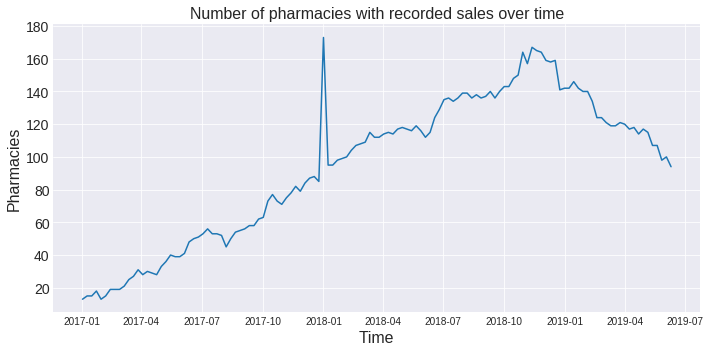

In [7]:
pharmaciesWeekBefore = dataframe.dropna(subset=['Quantity']).groupby(['Year', 'Week'])['Pharmacy'].nunique()

plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')
plt.plot(Time, pharmaciesWeekBefore[:128])
plt.title('Number of pharmacies with recorded sales over time', fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Pharmacies', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()  # Outlier in year 2018 week 1

Total sales per pharmacy around 01/2018

In [8]:
quantity17_51 = dataframe.loc[(dataframe['Year'] == 2017) & (dataframe['Week'] == 51)].groupby('Pharmacy')[
    'Quantity'].sum()
quantity17_52 = dataframe.loc[(dataframe['Year'] == 2017) & (dataframe['Week'] == 52)].groupby('Pharmacy')[
    'Quantity'].sum()
quantity18_01 = dataframe.loc[(dataframe['Year'] == 2018) & (dataframe['Week'] == 1)].groupby('Pharmacy')[
    'Quantity'].sum()
quantity18_02 = dataframe.loc[(dataframe['Year'] == 2018) & (dataframe['Week'] == 2)].groupby('Pharmacy')[
    'Quantity'].sum()
quantity18_03 = dataframe.loc[(dataframe['Year'] == 2018) & (dataframe['Week'] == 3)].groupby('Pharmacy')[
    'Quantity'].sum()
pharmacySales = pd.concat([quantity17_51, quantity17_52, quantity18_01, quantity18_02, quantity18_03], axis=1, sort=False)
pharmacySales.columns = ['Quantity 51/2017', 'Quantity 52/2017', 'Quantity 1/2018', 'Quantity 2/2018', 'Quantity 3/2018']

pharmacySales.reset_index()[70:100]

,Pharmacy,Quantity 51/2017,Quantity 52/2017,Quantity 1/2018,Quantity 2/2018,Quantity 3/2018
70,Pharmacy 166,0.0,0.0,0.0,0.0,0.0
71,Pharmacy 167,0.0,0.0,0.0,0.0,0.0
72,Pharmacy 168,0.0,0.0,0.0,0.0,0.0
73,Pharmacy 17,83.0,0.0,0.0,32.0,2.0
74,Pharmacy 170,0.0,0.0,0.0,0.0,0.0
75,Pharmacy 171,0.0,0.0,48.0,0.0,0.0
76,Pharmacy 172,0.0,0.0,0.0,0.0,0.0
77,Pharmacy 173,0.0,0.0,0.0,0.0,0.0
78,Pharmacy 174,0.0,0.0,142.0,0.0,0.0
79,Pharmacy 175,0.0,0.0,0.0,0.0,0.0


Total sales per week for different pharmacies over time

In [9]:
pharmacy1 = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 1')].groupby(['Year', 'Week'])['Quantity'].sum()
pharmacy8 = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 8')].groupby(['Year', 'Week'])['Quantity'].sum()
pharmacy77 = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 77')].groupby(['Year', 'Week'])['Quantity'].sum()
pharmacy147 = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 147')].groupby(['Year', 'Week'])['Quantity'].sum()
pharmacy212 = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 212')].groupby(['Year', 'Week'])['Quantity'].sum()
pharmacy224 = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 224')].groupby(['Year', 'Week'])['Quantity'].sum()
pharmacy260 = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 260')].groupby(['Year', 'Week'])['Quantity'].sum()

pharmacySalesWeek = pd.concat([pharmacy1, pharmacy8, pharmacy77, pharmacy147, pharmacy212, pharmacy224,
                               pharmacy260], axis=1, sort=False)
pharmacySalesWeek.columns = ['Pharmacy 1', 'Pharmacy 8', 'Pharmacy 77', 'Pharmacy 147', 'Pharmacy 212', 'Pharmacy 224',
                             'Pharmacy 260']
pharmacySalesWeek = pharmacySalesWeek.replace(0, np.nan)

pharmacySalesWeek.reset_index()[45:81]

,Year,Week,Pharmacy 1,Pharmacy 8,Pharmacy 77,Pharmacy 147,Pharmacy 212,Pharmacy 224,Pharmacy 260
45,2017.0,46.0,2601.0,1946.0,165.0,NaN,NaN,NaN,NaN
46,2017.0,47.0,13069.0,1974.0,241.0,NaN,NaN,NaN,NaN
47,2017.0,48.0,6111.0,1380.0,305.0,NaN,NaN,NaN,NaN
48,2017.0,49.0,5287.0,1178.0,148.0,NaN,NaN,NaN,NaN
49,2017.0,50.0,6472.0,1537.0,567.0,NaN,NaN,NaN,NaN
50,2017.0,51.0,8439.0,1810.0,504.0,NaN,NaN,NaN,NaN
51,2017.0,52.0,8599.0,1264.0,675.0,NaN,NaN,NaN,NaN
52,2018.0,1.0,7475.0,2258.0,470.0,1345.0,58.0,399.0,138.0
53,2018.0,2.0,4678.0,1842.0,628.0,903.0,NaN,NaN,NaN
54,2018.0,3.0,4842.0,1941.0,360.0,925.0,NaN,NaN,NaN


Artemether / Lumefantrine before cleaning:

In [10]:
Ph212_beforeCleaning = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 212')].groupby(['Year', 'Week'])[
                           'Quantity'].sum().reset_index()[49:56]

AL_beforeCleaning = dataframe.loc[
                        (dataframe['Pharmacy'] == 'Pharmacy 212') &
                        (dataframe['Product'] == 'Artemether / Lumefantrine (ACTm)') &
                        (dataframe['Brand'] == 'Al 24s') &
                        (dataframe['Strength'] == '20/120 mg')].reset_index()[49:56]
AL_beforeCleaning[['Pharmacy', 'Product', 'Brand', 'Strength', 'Year', 'Week', 'Quantity']]

,Pharmacy,Product,Brand,Strength,Year,Week,Quantity
49,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2017.0,50.0,NaN
50,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2017.0,51.0,NaN
51,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2017.0,52.0,NaN
52,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2018.0,1.0,3.0
53,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2018.0,2.0,NaN
54,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2018.0,3.0,NaN
55,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2018.0,4.0,NaN


**Data cleaning:** Replace quantity of 1/2018 if the three quantities before and after are NaNs

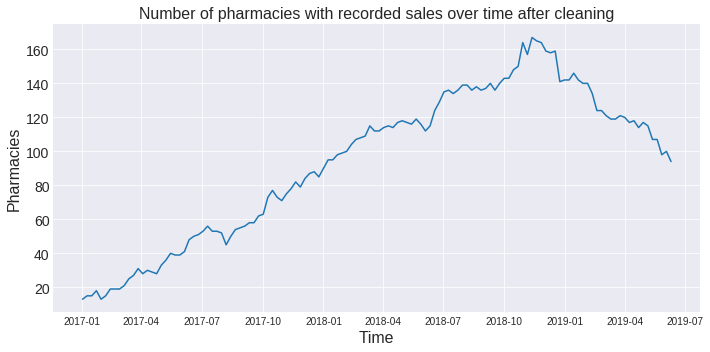

In [11]:
m = (dataframe['Quantity'].notna()
     .groupby(dataframe['Pharmacy'])
     .rolling(7, center=True).sum().le(1)
     .reset_index(level='Pharmacy', drop='Pharmacy'))
dataframe['Quantity'] = dataframe['Quantity'].mask(m & dataframe['Year'].eq(2018) & dataframe['Week'].eq(1))
n = (dataframe['Frequency'].notna()
     .groupby(dataframe['Pharmacy'])
     .rolling(7, center=True).sum().le(1)
     .reset_index(level='Pharmacy', drop='Pharmacy'))
dataframe['Frequency'] = dataframe['Frequency'].mask(n & dataframe['Year'].eq(2018) & dataframe['Week'].eq(1))

# Total malaria sales per Pharmacy after cleaning
pharmaciesWeekAfter = dataframe.dropna(subset=['Quantity']).groupby(['Year', 'Week'])['Pharmacy'].nunique()

plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')
plt.plot(Time, pharmaciesWeekAfter[:128])
plt.title('Number of pharmacies with recorded sales over time after cleaning', fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Pharmacies', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()  # Outlier has been removed

Number of pharmacies per week before and after cleaning

In [12]:
pharmaciesWeekBefore = pharmaciesWeekBefore.reset_index()[49:56]
pharmaciesWeekBefore.rename(columns={'Pharmacy': 'Pharmacy before'}, inplace=True)
pharmaciesWeekAfter = pharmaciesWeekAfter.reset_index()[49:56]
pharmaciesWeekAfter.rename(columns={'Pharmacy': 'Pharmacy after'}, inplace=True)

pd.concat([pharmaciesWeekBefore, pharmaciesWeekAfter['Pharmacy after']], axis=1, sort=False)

,Year,Week,Pharmacy before,Pharmacy after
49,2017.0,50.0,87,87
50,2017.0,51.0,88,88
51,2017.0,52.0,85,85
52,2018.0,1.0,173,90
53,2018.0,2.0,95,95
54,2018.0,3.0,95,95
55,2018.0,4.0,98,98


Artemether / Lumefantrine after cleaning

In [13]:
Ph212_afterCleaning = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 212')].groupby(['Year', 'Week'])[
                          'Quantity'].sum().reset_index()[49:56]

AL_afterCleaning = dataframe.loc[
    (dataframe['Pharmacy'] == 'Pharmacy 212') &
    (dataframe['Product'] == 'Artemether / Lumefantrine (ACTm)') &
    (dataframe['Brand'] == 'Al 24s') &
    (dataframe['Strength'] == '20/120 mg')].reset_index()

AL_afterCleaning[['Pharmacy', 'Product', 'Brand', 'Strength', 'Year', 'Week', 'Quantity']][49:56]

,Pharmacy,Product,Brand,Strength,Year,Week,Quantity
49,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2017.0,50.0,NaN
50,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2017.0,51.0,NaN
51,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2017.0,52.0,NaN
52,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2018.0,1.0,NaN
53,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2018.0,2.0,NaN
54,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2018.0,3.0,NaN
55,Pharmacy 212,Artemether / Lumefantrine (ACTm),Al 24s,20/120 mg,2018.0,4.0,NaN


Total quantity in Pharmacy 212 before and after cleaning

In [14]:
Ph212_beforeCleaning.rename(columns={'Quantity': 'Quantity before'}, inplace=True)
Ph212_beforeCleaning['Quantity before'] = Ph212_beforeCleaning['Quantity before'].replace(0, np.nan)
Ph212_afterCleaning.rename(columns={'Quantity': 'Quantity after'}, inplace=True)
Ph212_afterCleaning['Quantity after'] = Ph212_afterCleaning['Quantity after'].replace(0, np.nan)

pd.concat([Ph212_beforeCleaning, Ph212_afterCleaning['Quantity after']], axis=1, sort=False)

,Year,Week,Quantity before,Quantity after
49,2017.0,50.0,NaN,NaN
50,2017.0,51.0,NaN,NaN
51,2017.0,52.0,NaN,NaN
52,2018.0,1.0,58.0,NaN
53,2018.0,2.0,NaN,NaN
54,2018.0,3.0,NaN,NaN
55,2018.0,4.0,NaN,NaN


Total Antibiotics, Painkiller & Malaria sales for different pharmacies over time

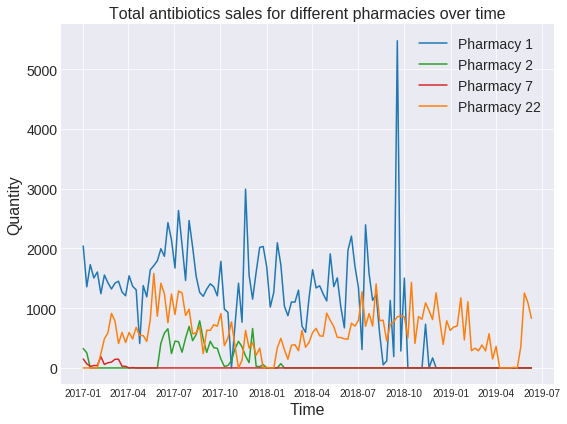

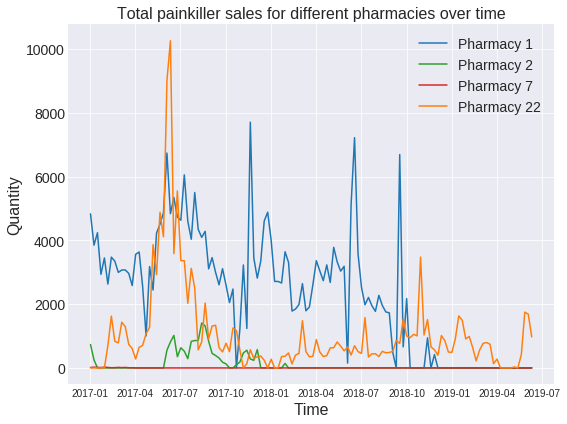

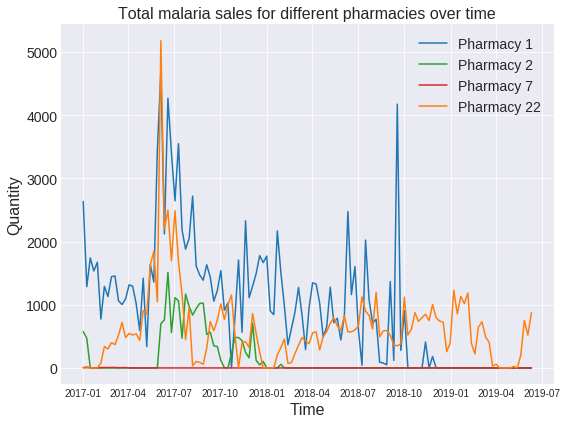

In [15]:
# Create the product groups
antibiotics = dataframe[(dataframe['Category'].str.contains('antibioti|antbioti', case=False)) |
                        (dataframe['Description'].str.contains('antibioti|antbioti', case=False))]
painkillers = dataframe[(dataframe['Category'].str.contains('pain', case=False)) |
                        (dataframe['Description'].str.contains('pain', case=False))]
malaria = dataframe[(dataframe['Category'].str.contains('malaria', case=False)) |
                    (dataframe['Description'].str.contains('malaria', case=False))]

# Figure: Number of antibiotics sold in different pharmacies over time
antibioticsPharmacy1 = antibiotics.loc[(antibiotics['Pharmacy'] == 'Pharmacy 1')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
antibioticsPharmacy2 = antibiotics.loc[(antibiotics['Pharmacy'] == 'Pharmacy 2')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
antibioticsPharmacy7 = antibiotics.loc[(antibiotics['Pharmacy'] == 'Pharmacy 7')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
antibioticsPharmacy22 = antibiotics.loc[(antibiotics['Pharmacy'] == 'Pharmacy 22')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()

plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.plot(Time, antibioticsPharmacy1, color='#1f77b4')
plt.plot(Time, antibioticsPharmacy2, color='#2ca02c')
plt.plot(Time, antibioticsPharmacy7, color='#d62728')
plt.plot(Time, antibioticsPharmacy22, color='#ff7f0e')
plt.legend(['Pharmacy 1', 'Pharmacy 2', 'Pharmacy 7', 'Pharmacy 22'], fontsize=14, loc='upper right')
plt.title('Total antibiotics sales for different pharmacies over time', fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Quantity', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Figure: Number of painkillers sold in different pharmacies over time
painkillerPharmacy1 = painkillers.loc[(painkillers['Pharmacy'] == 'Pharmacy 1')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
painkillerPharmacy2 = painkillers.loc[(painkillers['Pharmacy'] == 'Pharmacy 2')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
painkillerPharmacy7 = painkillers.loc[(painkillers['Pharmacy'] == 'Pharmacy 7')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
painkillerPharmacy22 = painkillers.loc[(painkillers['Pharmacy'] == 'Pharmacy 22')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()

plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.plot(Time, painkillerPharmacy1, color='#1f77b4')
plt.plot(Time, painkillerPharmacy2, color='#2ca02c')
plt.plot(Time, painkillerPharmacy7, color='#d62728')
plt.plot(Time, painkillerPharmacy22, color='#ff7f0e')
plt.legend(['Pharmacy 1', 'Pharmacy 2', 'Pharmacy 7', 'Pharmacy 22'], fontsize=14, loc='upper right')
plt.title('Total painkiller sales for different pharmacies over time', fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Quantity', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Figure: Number of malaria medicals sold in different pharmacies over time
malariaPharmacy1 = malaria.loc[(malaria['Pharmacy'] == 'Pharmacy 1')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
malariaPharmacy2 = malaria.loc[(malaria['Pharmacy'] == 'Pharmacy 2')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
malariaPharmacy7 = malaria.loc[(malaria['Pharmacy'] == 'Pharmacy 7')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()
malariaPharmacy22 = malaria.loc[(malaria['Pharmacy'] == 'Pharmacy 22')].groupby(
    ['Pharmacy', 'Year', 'Week'])['Quantity'].sum()

plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.plot(Time, malariaPharmacy1, color='#1f77b4')
plt.plot(Time, malariaPharmacy2, color='#2ca02c')
plt.plot(Time, malariaPharmacy7, color='#d62728')
plt.plot(Time, malariaPharmacy22, color='#ff7f0e')
plt.legend(['Pharmacy 1', 'Pharmacy 2', 'Pharmacy 7', 'Pharmacy 22'], fontsize=14, loc='upper right')
plt.title('Total malaria sales for different pharmacies over time', fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Quantity', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

**Data preprocessing:** Drop before first and after last occurrence for every time series

In [16]:
dataframe[['Pharmacy', 'Product', 'Brand', 'Strength']] \
    = dataframe[['Pharmacy', 'Product', 'Brand', 'Strength']].fillna('NA')  # otherwise NaNs are dropped
dataframe = dataframe.groupby(['Pharmacy', 'Product', 'Brand', 'Strength'], group_keys=False) \
    .apply(lambda x: x.loc[x['Quantity'].first_valid_index():x['Quantity'].last_valid_index()])

dataframe['Quantity'].fillna(0, inplace=True) # Replace NaN with 0
dataframe['Quantity'] = dataframe['Quantity'].astype('int32') # Quantity to integer

**Data preprocessing:** Create the product groups Antibiotics, Painkiller & Malaria

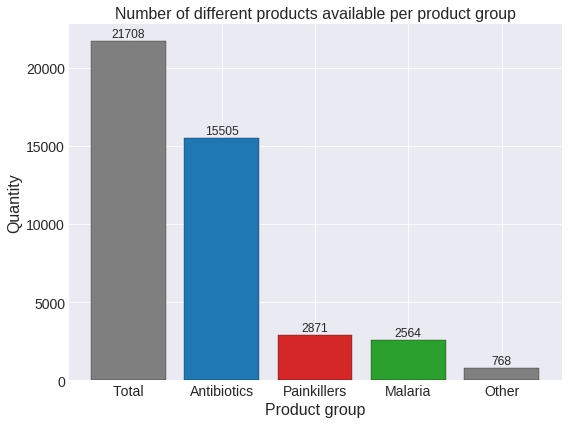

In [17]:
antibiotics = dataframe[(dataframe['Category'].str.contains('antibioti|antbioti', case=False)) |
                        (dataframe['Description'].str.contains('antibioti|antbioti', case=False))]
painkillers = dataframe[(dataframe['Category'].str.contains('pain', case=False)) |
                        (dataframe['Description'].str.contains('pain', case=False))]
malaria = dataframe[(dataframe['Category'].str.contains('malaria', case=False)) |
                    (dataframe['Description'].str.contains('malaria', case=False))]

# Figure: Number of different products available per product group
totalProducts = len(dataframe.drop_duplicates(subset=('Product', 'Brand', 'Strength'), keep='first'))
antibioticsProducts = len(antibiotics.drop_duplicates(subset=('Product', 'Brand', 'Strength'), keep='first'))
painkillerProducts = len(painkillers.drop_duplicates(subset=('Product', 'Brand', 'Strength'), keep='first'))
malariaProducts = len(malaria.drop_duplicates(subset=('Product', 'Brand', 'Strength'), keep='first'))
otherProducts = totalProducts - antibioticsProducts - painkillerProducts - malariaProducts

group = ['Total', 'Antibiotics', 'Painkillers', 'Malaria', 'Other']
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.bar(np.arange(len(group)), [totalProducts, antibioticsProducts, painkillerProducts, malariaProducts, otherProducts],
        color=['#7f7f7f', '#1f77b4', '#d62728', '#2ca02c', '#7f7f7f'], edgecolor='black', linewidth=0.3)
plt.xticks(np.arange(len(group)), group, fontsize=14), plt.yticks(fontsize=14)
plt.xlabel('Product group', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
for i, v in enumerate([totalProducts, antibioticsProducts]):
    plt.text(i - 0.18, v + 250, str(v), fontsize=12)
for i, v in enumerate([painkillerProducts, malariaProducts]):
    plt.text(i + 1.85, v + 250, str(v), fontsize=12)
for i, v in enumerate([otherProducts]):
    plt.text(i + 3.89, v + 250, str(v), fontsize=12)
plt.title('Number of different products available per product group', fontsize=16)
plt.tight_layout()
plt.show()

Share of total products available per product group

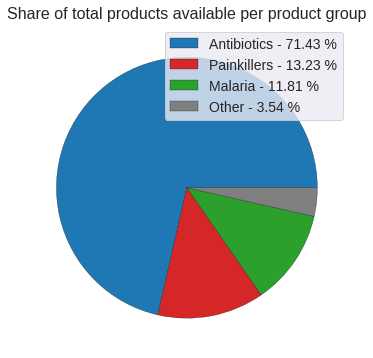

In [18]:
plt.figure(figsize=(8, 6))
plt.pie([antibioticsProducts, painkillerProducts, malariaProducts, otherProducts],
        colors=['#1f77b4', '#d62728', '#2ca02c', '#7f7f7f'], wedgeprops=dict(edgecolor='black', linewidth=0.25))
percentage = 100. * pd.Series([antibioticsProducts, painkillerProducts, malariaProducts, otherProducts]).astype(float) \
             / pd.Series([antibioticsProducts, painkillerProducts, malariaProducts, otherProducts]).sum()
plt.legend(['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(
    pd.Series(['Antibiotics', 'Painkillers', 'Malaria', 'Other']), percentage)], loc='best', fontsize=14, frameon=True)
plt.title('Share of total products available per product group', fontsize=16)
plt.show()

Correlation

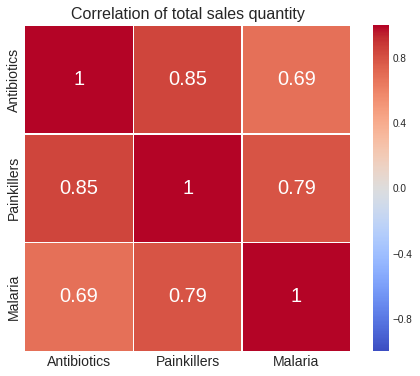

In [19]:
overallWeek = pd.DataFrame(dataframe.groupby(['Year', 'Week'])['Quantity'].sum())  # .reset_index())
antibioticsWeek = pd.DataFrame(antibiotics.groupby(['Year', 'Week'])['Quantity'].sum())  # .reset_index())
painkillersWeek = pd.DataFrame(painkillers.groupby(['Year', 'Week'])['Quantity'].sum())  # .reset_index())
malariaWeek = pd.DataFrame(malaria.groupby(['Year', 'Week'])['Quantity'].sum())  # .reset_index())

overallWeek['Antibiotics'] = antibioticsWeek['Quantity']
overallWeek['Painkillers'] = painkillersWeek['Quantity']
overallWeek['Malaria'] = malariaWeek['Quantity']

# Correlation heat map
plt.figure(figsize=(8,6))
ax1 = sns.heatmap(overallWeek.loc[:, 'Antibiotics':'Malaria'].astype(float).corr(), vmin=-1, vmax=1, center=0,
                  linewidths=0.5, cmap='coolwarm', square=True, annot=True, annot_kws={'size': 20})
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=14, va='center')
ax1.set_title('Correlation of total sales quantity', fontsize=16)
plt.show()

Number of weeks in which pharmacies recorded sales

In [20]:
pharmacies = pd.DataFrame(dataframe.groupby(['Pharmacy', 'Year', 'Week'])['Quantity'].sum())
pharmacies = pharmacies.groupby(['Pharmacy'])[['Quantity']].agg(lambda x: (x != 0).sum())

pharmacies.describe()

,Quantity
count,298.000000
mean,40.446309
std,33.212085
min,1.000000
25%,10.000000
50%,35.000000
75%,65.750000
max,124.000000


Total sales per product group over time

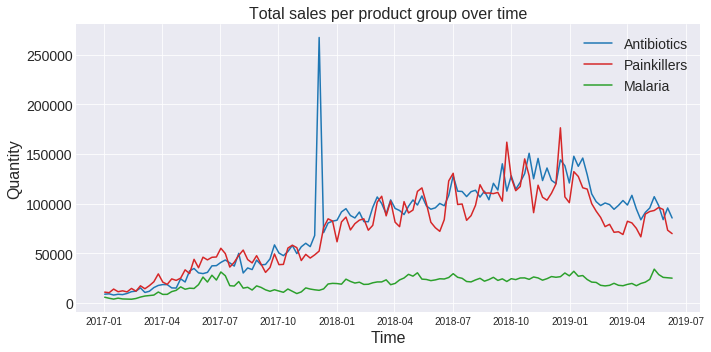

In [21]:
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')
plt.plot(Time, antibioticsWeek, color='#1f77b4')
plt.plot(Time, painkillersWeek, color='#d62728')
plt.plot(Time, malariaWeek, color='#2ca02c')
plt.legend(['Antibiotics', 'Painkillers', 'Malaria'], fontsize=14)
plt.title('Total sales per product group over time', fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Quantity', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()  # Outlier in Antibiotics in end of 2017

Descriptive statistics for quantity per product group

In [22]:
pd.DataFrame([dataframe['Quantity'].describe().apply(lambda x: format(x, 'f')),
              antibiotics['Quantity'].describe().apply(lambda x: format(x, 'f')),
              painkillers['Quantity'].describe().apply(lambda x: format(x, 'f')),
              malaria['Quantity'].describe().apply(lambda x: format(x, 'f'))],
             index=[['Total', 'Antibiotics', 'Painkillers', 'Malaria']]).T

,Total,Antibiotics,Painkillers,Malaria
count,1180072.000000,819940.000000,191263.000000,123701.000000
mean,19.140147,12.474527,49.049283,20.039975
std,304.998121,249.880719,537.128824,147.456589
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,3.000000,2.000000,7.000000,3.000000
max,201415.000000,201415.000000,85475.000000,9012.000000


Antibiotics sales observation with the maximum Quantity

In [23]:
antibiotics[['Pharmacy', 'Product', 'Brand', 'Strength', 'Year', 'Week', 'Quantity']].loc[antibiotics['Quantity'].idxmax()]

Pharmacy              Pharmacy 113
Product     Ampicillin/cloxacillin
Brand                 AMPICLO DAWA
Strength                        NA
Year                          2017
Week                            49
Quantity                    201415
Name: 224432, dtype: object

Sales quantity for the outlier before cleaning

In [24]:
antibiotics[['Pharmacy', 'Product', 'Brand', 'Strength', 'Category', 'Year', 'Week', 'Quantity']].loc[
    (antibiotics['Pharmacy'] == 'Pharmacy 113') &
    (antibiotics['Product'] == 'Ampicillin/cloxacillin') &
    (antibiotics['Brand'] == 'AMPICLO DAWA')].reset_index(drop=True)[2:7]


,Pharmacy,Product,Brand,Strength,Category,Year,Week,Quantity
2,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,47.0,360
3,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,48.0,815
4,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,49.0,201415
5,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,50.0,1115
6,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,51.0,405


**Data Cleaning:** Clean Antibiotics sales observation with the maximum quantity

In [25]:
# Replace the outlier with 0 in dataframe and antibiotics
dataframe['Quantity'].fillna(0, inplace=True)
antibiotics['Quantity'].fillna(0, inplace=True)

antibiotics.loc[(antibiotics['Pharmacy'] == 'Pharmacy 113') & (antibiotics['Product'] == 'Ampicillin/cloxacillin') &
                (antibiotics['Brand'] == 'AMPICLO DAWA') & (antibiotics['Year'] == 2017) &
                (antibiotics['Week'] == 49), 'Quantity'] = 0
dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 113') & (dataframe['Product'] == 'Ampicillin/cloxacillin') &
              (dataframe['Brand'] == 'AMPICLO DAWA') & (dataframe['Year'] == 2017) &
              (dataframe['Week'] == 49), 'Quantity'] = 0
# Replace 0 with the mean of the time series for this Pharmacy/Product/Brand
antibiotics.loc[(antibiotics['Pharmacy'] == 'Pharmacy 113') & (antibiotics['Product'] == 'Ampicillin/cloxacillin') &
                (antibiotics['Brand'] == 'AMPICLO DAWA') & (antibiotics['Year'] == 2017) &
                (antibiotics['Week'] == 49), 'Quantity'] = \
    round(antibiotics.loc[(antibiotics['Pharmacy'] == 'Pharmacy 113') &
                          (antibiotics['Product'] == 'Ampicillin/cloxacillin') &
                          (antibiotics['Brand'] == 'AMPICLO DAWA')]['Quantity'].mean())
dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 113') & (dataframe['Product'] == 'Ampicillin/cloxacillin') &
              (dataframe['Brand'] == 'AMPICLO DAWA') & (dataframe['Year'] == 2017) &
              (dataframe['Week'] == 49), 'Quantity'] = \
    round(dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 113') &
                        (dataframe['Product'] == 'Ampicillin/cloxacillin') &
                        (dataframe['Brand'] == 'AMPICLO DAWA')]['Quantity'].mean())
antibioticsWeek = antibiotics.groupby(['Year', 'Week'])['Quantity'].sum()
overallWeek = dataframe.groupby(['Year', 'Week'])['Quantity'].sum()

Sales quantity for the outlier after cleaning

In [26]:
antibiotics[['Pharmacy', 'Product', 'Brand', 'Strength', 'Category', 'Year', 'Week', 'Quantity']].loc[
    (antibiotics['Pharmacy'] == 'Pharmacy 113') &
    (antibiotics['Product'] == 'Ampicillin/cloxacillin') &
    (antibiotics['Brand'] == 'AMPICLO DAWA')].reset_index(drop=True)[2:7]

,Pharmacy,Product,Brand,Strength,Category,Year,Week,Quantity
2,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,47.0,360
3,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,48.0,815
4,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,49.0,584
5,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,50.0,1115
6,Pharmacy 113,Ampicillin/cloxacillin,AMPICLO DAWA,NA,Antibiotic,2017.0,51.0,405


Total sales per product group over time after cleaning

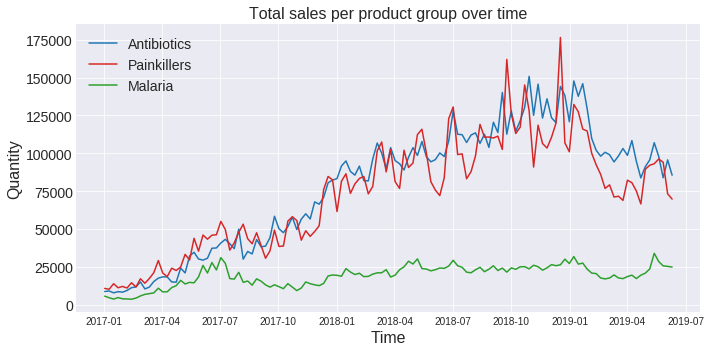

In [27]:
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')
plt.plot(Time, antibioticsWeek, color='#1f77b4')
plt.plot(Time, painkillersWeek, color='#d62728')
plt.plot(Time, malariaWeek, color='#2ca02c')
plt.legend(['Antibiotics', 'Painkillers', 'Malaria'], fontsize=14)
plt.title('Total sales per product group over time', fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Quantity', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Total sales per product group

In [28]:
totalSales = dataframe['Quantity'].sum()
antibioticsSales = antibiotics['Quantity'].sum()
painkillerSales = painkillers['Quantity'].sum()
malariaSales = malaria['Quantity'].sum()
otherSales = totalSales - antibioticsSales - painkillerSales - malariaSales

Total sales per product group

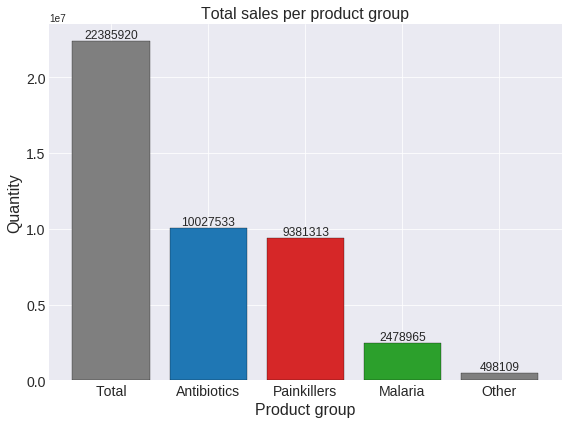

In [29]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
group1 = ['Total', 'Antibiotics', 'Painkillers', 'Malaria', 'Other']
plt.bar(np.arange(len(group1)), [totalSales, antibioticsSales, painkillerSales, malariaSales, otherSales],
        color=['#7f7f7f', '#1f77b4', '#d62728', '#2ca02c', '#7f7f7f'], edgecolor='black', linewidth=0.3)
# plt.ticklabel_format(style='plain')
plt.xticks(np.arange(len(group1)), group1, fontsize=14), plt.yticks(fontsize=14)
plt.xlabel('Product group', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
plt.title('Total sales per product group', fontsize=16)
for i, v in enumerate([int(totalSales), int(antibioticsSales)]):
    plt.text(i - 0.28, v + 200000, str(v), fontsize=12)
for i, v in enumerate([int(painkillerSales), int(malariaSales)]):
    plt.text(i + 1.76, v + 200000, str(v), fontsize=12)
for i, v in enumerate([int(otherSales)]):
    plt.text(i + 3.80, v + 200000, str(v), fontsize=12)
plt.tight_layout()
plt.show()

Share of total sales quantity per product group

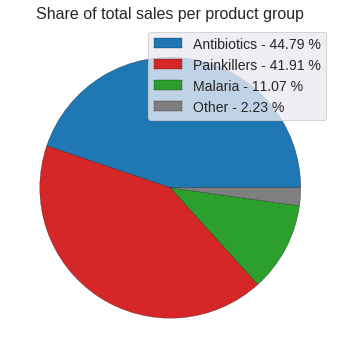

In [30]:
plt.figure(figsize=(8, 6))
plt.pie([antibioticsSales, painkillerSales, malariaSales, otherSales],
        colors=['#1f77b4', '#d62728', '#2ca02c', '#7f7f7f'], wedgeprops=dict(edgecolor='black', linewidth=0.25))
percentage3 = 100. * pd.Series([antibioticsSales, painkillerSales, malariaSales, otherSales]).astype(float) / \
              pd.Series([antibioticsSales, painkillerSales, malariaSales, otherSales]).sum()
plt.legend(['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(
    pd.Series(['Antibiotics', 'Painkillers', 'Malaria', 'Other']), percentage3)], loc='best', fontsize=14, frameon=True)
plt.title('Share of total sales per product group', fontsize=16)
plt.show()

Total sales per product group for different pharmacies

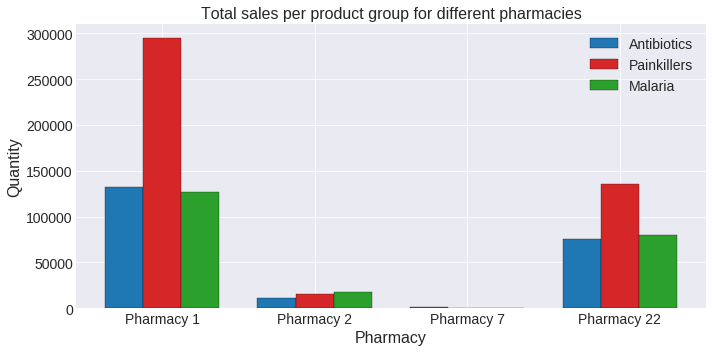

In [31]:
antibioticsPharmacy = pd.DataFrame(antibiotics.groupby(['Pharmacy'])['Quantity'].sum())
antibioticsPharmacy = antibioticsPharmacy.loc[
                      ['Pharmacy 1', 'Pharmacy 2', 'Pharmacy 7', 'Pharmacy 22'], :]
antibioticsPharmacy = antibioticsPharmacy['Quantity'].tolist()
painkillersPharmacy = pd.DataFrame(painkillers.groupby(['Pharmacy'])['Quantity'].sum())
painkillersPharmacy = painkillersPharmacy.loc[
                      ['Pharmacy 1', 'Pharmacy 2', 'Pharmacy 7', 'Pharmacy 22'], :]
painkillersPharmacy = painkillersPharmacy['Quantity'].tolist()
malariaPharmacy = pd.DataFrame(malaria.groupby(['Pharmacy'])['Quantity'].sum())
malariaPharmacy = malariaPharmacy.loc[
                  ['Pharmacy 1', 'Pharmacy 2', 'Pharmacy 7', 'Pharmacy 22'], :]
malariaPharmacy = malariaPharmacy['Quantity'].tolist()

# Set position of bar on X-axis
r1 = np.arange(len(antibioticsPharmacy))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]

plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')
plt.bar(r1, antibioticsPharmacy, width=0.25, edgecolor='black', color='#1f77b4', linewidth=0.3)
plt.bar(r2, painkillersPharmacy, width=0.25, edgecolor='black', color='#d62728', linewidth=0.3)
plt.bar(r3, malariaPharmacy, width=0.25, edgecolor='black', color='#2ca02c', linewidth=0.3)
plt.legend(['Antibiotics', 'Painkillers', 'Malaria'], fontsize=14)
plt.title('Total sales per product group for different pharmacies', fontsize=16)
plt.xticks([r + 0.25 for r in range(len(antibioticsPharmacy))],
           ['Pharmacy 1', 'Pharmacy 2', 'Pharmacy 7', 'Pharmacy 22'], fontsize=14)
plt.xlabel('Pharmacy', fontsize=16), plt.ylabel('Quantity', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Histogram of Antibiotics, Painkiller & Malaria

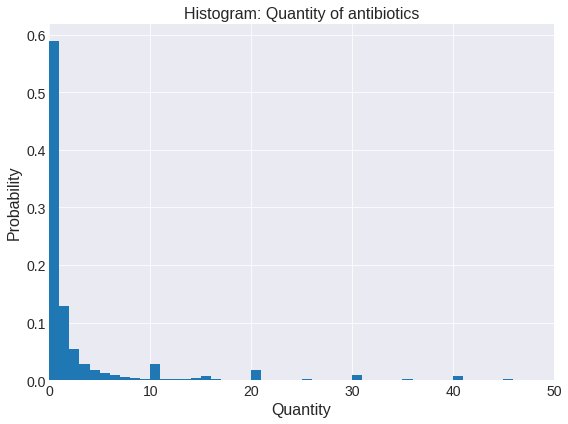

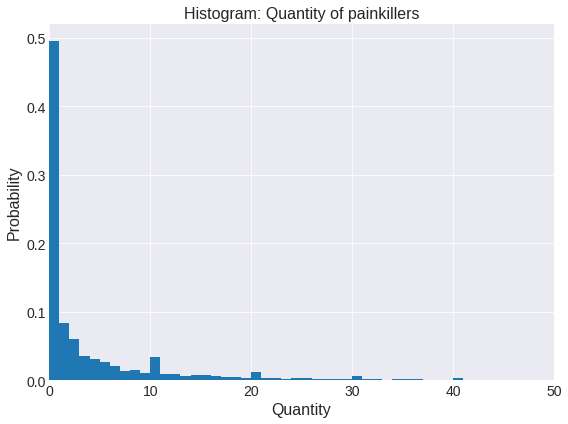

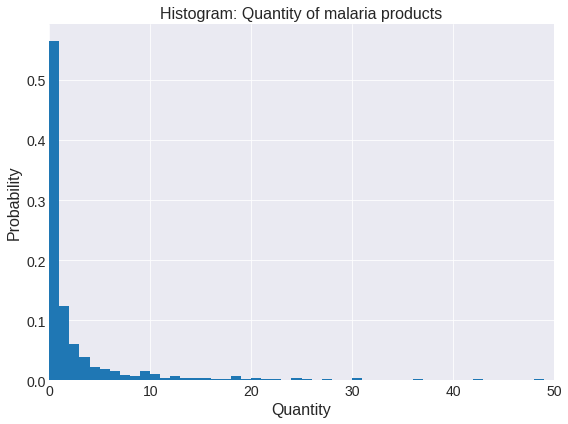

In [32]:
# Figure: Histogram: Quantity of antibiotics
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.hist(antibiotics['Quantity'], np.array(range(0, 1000, 1)), density=True)
plt.title('Histogram: Quantity of antibiotics', fontsize=16)
plt.xlabel('Quantity', fontsize=16), plt.ylabel('Probability', fontsize=16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14), plt.xlim(0, 50)
plt.tight_layout()
plt.show()

# Figure: Histogram: Quantity of painkillers
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.hist(painkillers['Quantity'], np.array(range(0, 1000, 1)), density=True)
plt.title('Histogram: Quantity of painkillers', fontsize=16)
plt.xlabel('Quantity', fontsize=16), plt.ylabel('Probability', fontsize=16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14), plt.xlim(0, 50)
plt.tight_layout()
plt.show()

# Figure: Histogram: Quantity of malaria
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.hist(malaria['Quantity'], np.array(range(0, 1000, 1)), density=True)
plt.title('Histogram: Quantity of malaria products', fontsize=16)
plt.xlabel('Quantity', fontsize=16), plt.ylabel('Probability', fontsize=16)
plt.xticks(fontsize=14), plt.yticks(fontsize=14), plt.xlim(0, 50)
plt.tight_layout()
plt.show()

Constant versus lumpy time series

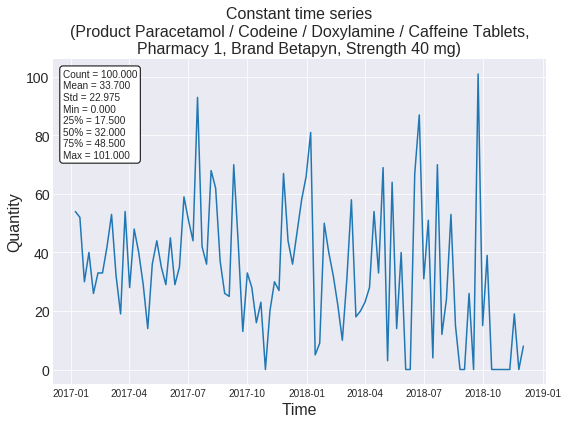

In [33]:
# Example time series for dataframeConstant
timeseriesConstant = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 1') &
                                   (dataframe['Product'] == 'Paracetamol / Codeine / Doxylamine / Caffeine Tablets') &
                                   (dataframe['Brand'] == 'Betapyn') &
                                   (dataframe['Strength'] == '40 mg')].reset_index()
timeseriesConstant[['Year', 'Week']] = timeseriesConstant[['Year', 'Week']].astype('int32')  # Year and Week to integer
dates = timeseriesConstant.Year * 100 + timeseriesConstant.Week
timeseriesConstant['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

timeseriesConstantStats = 'Count = {0:.3f}\nMean = {1:.3f}\nStd = {2:.3f}\nMin = {3:.3f}\n25% = {4:.3f}\n50% = {5:.3f}' \
                          '\n75% = {6:.3f}\nMax = {7:.3f}'.format(timeseriesConstant.describe()['Quantity']['count'],
                                                                  timeseriesConstant.describe()['Quantity']['mean'],
                                                                  timeseriesConstant.describe()['Quantity']['std'],
                                                                  timeseriesConstant.describe()['Quantity']['min'],
                                                                  timeseriesConstant.describe()['Quantity']['25%'],
                                                                  timeseriesConstant.describe()['Quantity']['50%'],
                                                                  timeseriesConstant.describe()['Quantity']['75%'],
                                                                  timeseriesConstant.describe()['Quantity']['max'])

# Figure: Constant time series
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.plot(timeseriesConstant['Date'], timeseriesConstant['Quantity'])
plt.text(0.02, 0.97, timeseriesConstantStats, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=1, boxstyle='round'))
plt.title('Constant time series\n(Product {0},\n{1}, Brand {2}, Strength {3})'.format(
    timeseriesConstant['Product'][0], timeseriesConstant['Pharmacy'][0],
    timeseriesConstant['Brand'][0], timeseriesConstant['Strength'][0]), fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Quantity', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


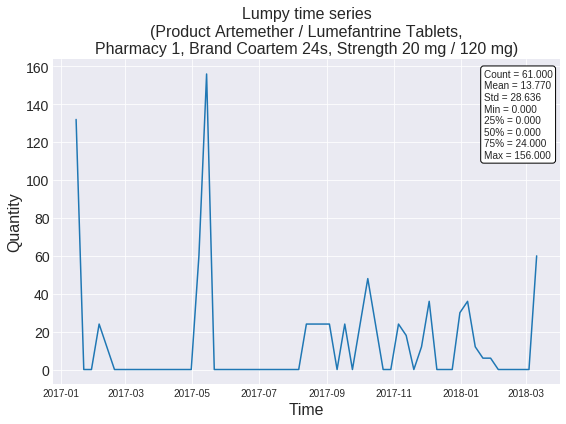

In [34]:
# Example time series for dataframeLumpy
timeseriesLumpy = dataframe.loc[(dataframe['Pharmacy'] == 'Pharmacy 1') &
                                (dataframe['Product'] == 'Artemether / Lumefantrine Tablets') &
                                (dataframe['Brand'] == 'Coartem 24s') &
                                (dataframe['Strength'] == '20 mg / 120 mg')].reset_index()
timeseriesLumpy[['Year', 'Week']] = timeseriesLumpy[['Year', 'Week']].astype('int32')  # Year and Week to integer
dates = timeseriesLumpy.Year * 100 + timeseriesLumpy.Week
timeseriesLumpy['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

timeseriesLumpyStats = 'Count = {0:.3f}\nMean = {1:.3f}\nStd = {2:.3f}\nMin = {3:.3f}\n25% = {4:.3f}\n50% = {5:.3f}' \
                       '\n75% = {6:.3f}\nMax = {7:.3f}'.format(timeseriesLumpy.describe()['Quantity']['count'],
                                                               timeseriesLumpy.describe()['Quantity']['mean'],
                                                               timeseriesLumpy.describe()['Quantity']['std'],
                                                               timeseriesLumpy.describe()['Quantity']['min'],
                                                               timeseriesLumpy.describe()['Quantity']['25%'],
                                                               timeseriesLumpy.describe()['Quantity']['50%'],
                                                               timeseriesLumpy.describe()['Quantity']['75%'],
                                                               timeseriesLumpy.describe()['Quantity']['max'])
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')
plt.plot(timeseriesLumpy['Date'], timeseriesLumpy['Quantity'])
plt.text(0.85, 0.97, timeseriesLumpyStats, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=1, boxstyle='round'))
plt.title('Lumpy time series\n(Product {0},\n{1}, Brand {2}, Strength {3})'.format(
    timeseriesLumpy['Product'][0], timeseriesLumpy['Pharmacy'][0],
    timeseriesLumpy['Brand'][0], timeseriesLumpy['Strength'][0]), fontsize=16)
plt.xlabel('Time', fontsize=16), plt.ylabel('Quantity', fontsize=16), plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Descriptive statistics for *Price*

In [35]:
data = data.drop_duplicates(subset=('Pharmacy', 'Product', 'Brand', 'Strength'), keep='first')

data['Price'].describe()

count    38071.000000
mean       189.167536
std        957.903354
min          0.000000
25%         20.000000
50%         50.000000
75%        150.000000
max      90000.000000
Name: Price, dtype: float64

Products with highest price before

In [36]:
data[['Pharmacy', 'Product', 'Brand', 'Strength', 'Cost', 'Price']].nlargest(5, ['Price'])

,Pharmacy,Product,Brand,Strength,Cost,Price
4659,Pharmacy 110,paracetamol,Paracetamol,500mg,0.44,90000.0
47096,Pharmacy 309,R.oasis ITRACON,Unison,100mg,55275.00,60000.0
46964,Pharmacy 309,Global Rufex 500,Global,500mg,44700.00,50000.0
47037,Pharmacy 309,Mega Myclav 625,Unichem,500/125mg,26250.00,30000.0
47050,Pharmacy 309,Myclav-625,Unichem,625mg,26250.00,30000.0


**Data cleaning:** Replace highest price with cost * 1.2

In [37]:
data.loc[data['Price'] > 60000, 'Price'] = data['Cost'] * 1.2

Products with highest price after

In [38]:
data[['Pharmacy', 'Product', 'Brand', 'Strength', 'Cost', 'Price']].nlargest(5, ['Price'])

,Pharmacy,Product,Brand,Strength,Cost,Price
47096,Pharmacy 309,R.oasis ITRACON,Unison,100mg,55275.0,60000.0
46964,Pharmacy 309,Global Rufex 500,Global,500mg,44700.0,50000.0
47037,Pharmacy 309,Mega Myclav 625,Unichem,500/125mg,26250.0,30000.0
47050,Pharmacy 309,Myclav-625,Unichem,625mg,26250.0,30000.0
47149,Pharmacy 309,Zifam LVZ,Zifam,500mg,27830.0,30000.0


Outlier after

In [39]:
data[['Pharmacy', 'Product', 'Brand', 'Strength', 'Cost', 'Price']].loc[(data['Product'] == 'paracetamol') &
                                                                        (data['Brand'] == 'Paracetamol') &
                                                                        (data['Strength'] == '500mg')]

,Pharmacy,Product,Brand,Strength,Cost,Price
4659,Pharmacy 110,paracetamol,Paracetamol,500mg,0.44,0.528


Products with lowest price before

In [40]:
print('Before: {} products with price = 0.0'.format(len(data[data['Price'] == 0])))

data[['Pharmacy', 'Product', 'Brand', 'Strength', 'Cost', 'Price']][data['Price'] == 0].head()

Before: 108 products with price = 0.0


,Pharmacy,Product,Brand,Strength,Cost,Price
16514,Pharmacy 162,Artemether / Lumefantrine tablets,Al 12s,20/120mg,39.9,0.0
16541,Pharmacy 162,Ciprofloxacin Tablets,Ciprofloxacin Generic Tablets,250 mg,0.0,0.0
38198,Pharmacy 258,Aceclofenac / Paracetamol Tablets,Rilif Plus,100mg/500mg,0.0,0.0
42296,Pharmacy 271,Amoxycillin,Amoxyl,NaN,0.0,0.0
42297,Pharmacy 271,Amoxycillin,Amoxyl DS Tablets,250,8.9,0.0


**Data cleaning:** Replace price 0 with cost * 1.2

In [41]:
data.loc[data['Price'] == 0, 'Price'] = data['Cost'] * 1.2

Products with lowest price after

In [42]:
print('After: {} products with price 0.0'.format(len(data[data['Price'] == 0])))

data[['Pharmacy', 'Product', 'Brand', 'Strength', 'Cost', 'Price']][data['Price'] == 0].head()

After: 69 products with price 0.0


,Pharmacy,Product,Brand,Strength,Cost,Price
16541,Pharmacy 162,Ciprofloxacin Tablets,Ciprofloxacin Generic Tablets,250 mg,0.0,0.0
38198,Pharmacy 258,Aceclofenac / Paracetamol Tablets,Rilif Plus,100mg/500mg,0.0,0.0
42296,Pharmacy 271,Amoxycillin,Amoxyl,NaN,0.0,0.0
42298,Pharmacy 271,Artemether / Lumefantrine (ACTm) Tablets,AL 12s,20mg/120mg,0.0,0.0
42300,Pharmacy 271,Artemether / Lumefantrine (ACTm) Tablets,AL 18s,20mg/120mg,0.0,0.0


Weather features using the example of *TempMax*

In [43]:
dataframe[['Year', 'Week', 'Country', 'City', 'TempMax', 'TempMax_1', 'TempMax.avg_2', 'TempMax.avg_5',
                 'TempMax.avg.Lag1_5', 'TempMax.avg.Lag2_5', 'TempMax.avg.Lag3_5', 'TempMax.avg.Lag4_6',
                 'TempMax.LookAhead_1', 'TempMax.LookAhead_2']].head()

,Year,Week,Country,City,TempMax,TempMax_1,TempMax.avg_2,TempMax.avg_5,TempMax.avg.Lag1_5,TempMax.avg.Lag2_5,TempMax.avg.Lag3_5,TempMax.avg.Lag4_6,TempMax.LookAhead_1,TempMax.LookAhead_2
3377,2017.0,50.0,Kenya,BONDO,29.897143,28.628333,28.685833,28.431533,29.118562,28.173143,28.229143,28.243048,31.184286,30.540714
3378,2017.0,51.0,Kenya,BONDO,31.184286,29.897143,29.262738,29.017362,28.218162,28.954857,28.248286,28.143762,31.013333,31.098810
3379,2017.0,52.0,Kenya,BONDO,31.013333,31.184286,30.540714,29.430619,28.419429,29.032333,28.153143,28.062571,27.700000,29.356667
3380,2018.0,1.0,Kenya,BONDO,27.700000,31.013333,31.098810,29.893286,28.548857,29.099190,28.128286,28.000667,27.992857,27.846429
3381,2018.0,2.0,Kenya,BONDO,27.992857,27.700000,29.356667,29.684619,28.530724,29.138848,27.934000,28.307810,29.018571,28.505714


Google Trends features using the example of *Disease*

In [44]:
trends[['Year', 'Week', 'Country', 'Disease', 'Disease_1', 'Disease.Lag1_1',
        'Disease.Lag5_1', 'Disease.avg_5', 'Disease.avg.Lag1_5', 'Disease.avg.Lag2_5',
        'Disease.avg.Lag3_5', 'Disease.roc_4', 'Disease.roc.Lag1_4']].head()

,Year,Week,Country,Disease,Disease_1,Disease.Lag1_1,Disease.Lag5_1,Disease.avg_5,Disease.avg.Lag1_5,Disease.avg.Lag2_5,Disease.avg.Lag3_5,Disease.roc_4,Disease.roc.Lag1_4
0,2017,1,Kenya,28,25,34,47,38.2,53.2,50.2,37.8,-78.571429,-4.000000
1,2017,2,Kenya,37,28,25,50,34.4,52.0,52.0,39.2,5.405405,-57.142857
2,2017,3,Kenya,41,37,28,35,31.8,51.8,52.8,41.2,17.073171,-61.764706
3,2017,4,Kenya,39,41,37,34,33.0,48.4,52.8,44.0,35.897436,-88.000000
4,2017,5,Kenya,47,39,41,25,34.0,44.2,53.4,47.4,40.425532,-78.571429


Total sales per week in Pharmacy 1

In [45]:
pharmacy1.reset_index()[85:100]

,Year,Week,Quantity
85,2018.0,34.0,1870.0
86,2018.0,35.0,1885.0
87,2018.0,36.0,2975.0
88,2018.0,37.0,312.0
89,2018.0,38.0,16354.0
90,2018.0,39.0,1225.0
91,2018.0,40.0,4614.0
92,2018.0,41.0,0.0
93,2018.0,42.0,0.0
94,2018.0,43.0,0.0


In [46]:
print('--- %s seconds ---' % round((time.time() - start_time), 2))

--- 195.9 seconds ---
